# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Rossi, Elena (s349342);
2. Zoccatelli, Giorgio (s349395).

Now, fill the python list below with the Student IDs of the team

In [1]:
StudentIDs = [349342,349395] 

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Smoking
Alcohol
History
Psychology
Politics
Physics
Internet
PC
Economy Management
Biology
Geography
Foreign languages
Law
Cars
Art exhibitions
Religion
Countryside, outdoors
Dancing
Passive sport
Active sport
Gardening
Celebrities
Shopping
Science and technology
Theatre
Adrenaline sports
Pets
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
Fantasy/Fairy tales
Documentary
Western
Music
Slow songs or fast songs
Folk
Musical
Pop
Metal or Hardrock
Punk
Swing, Jazz
Rock n roll
Alternative
Latino
Techno, Trance
Opera
Daily events
Prioritising workload
Writing notes
Thinking ahead
Keeping promises
Friends versus money
Fake
Criminal damage
Decision making
Self-criticism
Hypochondria
Empathy
Eating to survive
Giving
Compassion to animals
Changing the past
God
Charity
Waiting
New environment
Achievements
Assertiveness
Knowing the r

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Smoking,Alcohol,History,Psychology,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
565,4,4,1,5,5,5,current smoker,social drinker,3,5,...,19,193,77,1,male,right,secondary school,yes,city,block of flats
182,3,1,1,1,5,3,tried smoking,social drinker,1,3,...,17,167,57,2,female,left,primary school,yes,city,block of flats
467,4,3,3,2,3,1,never smoked,social drinker,3,5,...,18,165,48,2,female,right,secondary school,no,city,block of flats
612,2,2,4,5,2,1,current smoker,drink a lot,5,2,...,21,164,52,2,female,right,secondary school,no,city,block of flats
37,4,4,3,3,5,3,current smoker,social drinker,4,5,...,25,170,67,1,female,right,masters degree,no,village,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3,3,3,4,4,4,current smoker,drink a lot,2,3,...,19,183,78,1,male,right,secondary school,no,city,house/bungalow
105,3,3,4,3,2,3,never smoked,never,4,2,...,21,185,90,1,male,right,secondary school,no,village,house/bungalow
366,3,3,3,3,3,3,former smoker,social drinker,4,3,...,23,174,62,1,female,right,masters degree,no,city,block of flats
499,5,2,1,1,1,1,never smoked,social drinker,3,2,...,19,168,56,3,female,right,secondary school,no,city,block of flats



*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Smoking,Alcohol,History,Psychology,...,Questionnaires or polls,Internet usage,Flying,Storm,Darkness,Heights,Snakes,Ageing,Dangerous dogs,Fear of public speaking
565,4,4,1,5,5,5,current smoker,social drinker,3,5,...,2,few hours a day,1,1,3,2,5,2,2,1
182,3,1,1,1,5,3,tried smoking,social drinker,1,3,...,5,few hours a day,3,2,1,3,1,1,2,2
467,4,3,3,2,3,1,never smoked,social drinker,3,5,...,3,few hours a day,1,2,1,1,5,3,5,3
612,2,2,4,5,2,1,current smoker,drink a lot,5,2,...,4,less than an hour a day,4,1,2,2,5,5,3,5
37,4,4,3,3,5,3,current smoker,social drinker,4,5,...,4,few hours a day,3,2,4,5,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3,3,3,4,4,4,current smoker,drink a lot,2,3,...,2,few hours a day,2,1,1,2,3,2,3,1
105,3,3,4,3,2,3,never smoked,never,4,2,...,2,few hours a day,1,1,2,4,3,1,3,2
366,3,3,3,3,3,3,former smoker,social drinker,4,3,...,3,less than an hour a day,4,2,5,2,5,3,4,1
499,5,2,1,1,1,1,never smoked,social drinker,3,2,...,3,less than an hour a day,1,2,1,3,2,2,4,2



*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
565,19,193,77,1,male,right,secondary school,yes,city,block of flats
182,17,167,57,2,female,left,primary school,yes,city,block of flats
467,18,165,48,2,female,right,secondary school,no,city,block of flats
612,21,164,52,2,female,right,secondary school,no,city,block of flats
37,25,170,67,1,female,right,masters degree,no,village,block of flats
...,...,...,...,...,...,...,...,...,...,...
139,19,183,78,1,male,right,secondary school,no,city,house/bungalow
105,21,185,90,1,male,right,secondary school,no,village,house/bungalow
366,23,174,62,1,female,right,masters degree,no,city,block of flats
499,19,168,56,3,female,right,secondary school,no,city,block of flats


## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [3]:
%matplotlib widget
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, Dropdown

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [4]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
...

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
...

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [5]:
responses_df = pd.read_csv("responses_hw.csv", sep=",", index_col=0)
columns_df = pd.read_csv("columns_hw.csv", sep=",")

ordinal_cols = ['Smoking','Alcohol','Punctuality','Lying','Internet usage','Education']
nominal_cols = ['Gender','Hand','Only child','Home Town Type','Home Type']
numeric_cols = [col for col in responses_df.columns if col not in ordinal_cols + nominal_cols]

ordinal_encoder = OrdinalEncoder(categories=[
    ['never smoked', 'tried smoking', 'former smoker', 'current smoker'],
    ['never', 'social drinker', 'drink a lot'],
    ['early', 'on time', 'late'],
    ['never', 'only to avoid hurting someone', 'sometimes', 'everytime it suits me'],
    ['less than an hour a day', 'few hours a day', 'most of the day'],
    ['currently a primary school pupil','primary school','secondary school','college/bachelor degree','masters degree','doctorate degree']
])

preprocessor = ColumnTransformer(transformers=[
    ('ord', ordinal_encoder, ordinal_cols),
    ('nom', OneHotEncoder(drop='first'), nominal_cols)],
    remainder='passthrough'
)


encoded_data = preprocessor.fit_transform(responses_df)
nominal_features = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_cols)
feature_names = ordinal_cols + nominal_features.tolist() + numeric_cols

responses_ft_enc = pd.DataFrame(encoded_data, index=responses_df.index, columns=feature_names)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(responses_ft_enc)

responses_ft_pp = pd.DataFrame(scaled_data, index=responses_df.index, columns=feature_names)

print("### PREPROCESSING VALIDATION REPORT ###\n")

print("--- 1. Shape Comparison (Original -> Encoded -> Scaled) ---")
print(f"Original Data:           {responses_df.shape}")
print(f"Encoded Data (ft_enc):   {responses_ft_enc.shape}")
print(f"Processed Data (ft_pp):  {responses_ft_pp.shape}")

print("\n--- 2. New One-Hot Encoded Feature Names ---")
print(f"Binary features created from nominal cols ({len(nominal_features)}):")
print(nominal_features.tolist())

print("\n--- 3. Value Comparison: Encoded vs Scaled ---")
ex_ord = ordinal_cols[-1] 
print(f"\n[Ordinal Feature: '{ex_ord}']")
print(f"  Encoded values (Integers):  {np.sort(responses_ft_enc[ex_ord].unique())}")
print(f"  Scaled values (Z-Scores):   {np.sort(responses_ft_pp[ex_ord].unique().round(3))}")

ex_nom = nominal_features[0]
print(f"\n[Binary Feature: '{ex_nom}']")
print(f"  Encoded values (0/1):       {responses_ft_enc[ex_nom].unique()}")
print(f"  Scaled values (Floats):     {responses_ft_pp[ex_nom].unique().round(3)}")

print("\n--- 4. Statistical Check (Random Sample: Before vs After Scaling) ---")
sample_cols = responses_ft_pp.sample(n=3, axis=1, random_state=42).columns
comparison_data = []
for col in sample_cols:
    comparison_data.append({
        "Feature": col,
        "Mean (Enc)": responses_ft_enc[col].mean(),    
        "Std (Enc)": responses_ft_enc[col].std(),      
        "Mean (Scaled)": responses_ft_pp[col].mean(),  
        "Std (Scaled)": responses_ft_pp[col].std()     
    })

comparison_df = pd.DataFrame(comparison_data).set_index("Feature")
print(comparison_df.round(4))

### PREPROCESSING VALIDATION REPORT ###

--- 1. Shape Comparison (Original -> Encoded -> Scaled) ---
Original Data:           (674, 150)
Encoded Data (ft_enc):   (674, 150)
Processed Data (ft_pp):  (674, 150)

--- 2. New One-Hot Encoded Feature Names ---
Binary features created from nominal cols (5):
['Gender_male', 'Hand_right', 'Only child_yes', 'Home Town Type_village', 'Home Type_house/bungalow']

--- 3. Value Comparison: Encoded vs Scaled ---

[Ordinal Feature: 'Education']
  Encoded values (Integers):  [0. 1. 2. 3. 4. 5.]
  Scaled values (Z-Scores):   [-3.055 -1.721 -0.388  0.946  2.279  3.613]

[Binary Feature: 'Gender_male']
  Encoded values (0/1):       [0. 1.]
  Scaled values (Floats):     [-0.823  1.216]

--- 4. Statistical Check (Random Sample: Before vs After Scaling) ---
             Mean (Enc)  Std (Enc)  Mean (Scaled)  Std (Scaled)
Feature                                                        
Pets             3.3279     1.5518           -0.0        1.0007
Pop         

#### Comment the results obtained after the preprocessing operation (max 100 words):
...

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

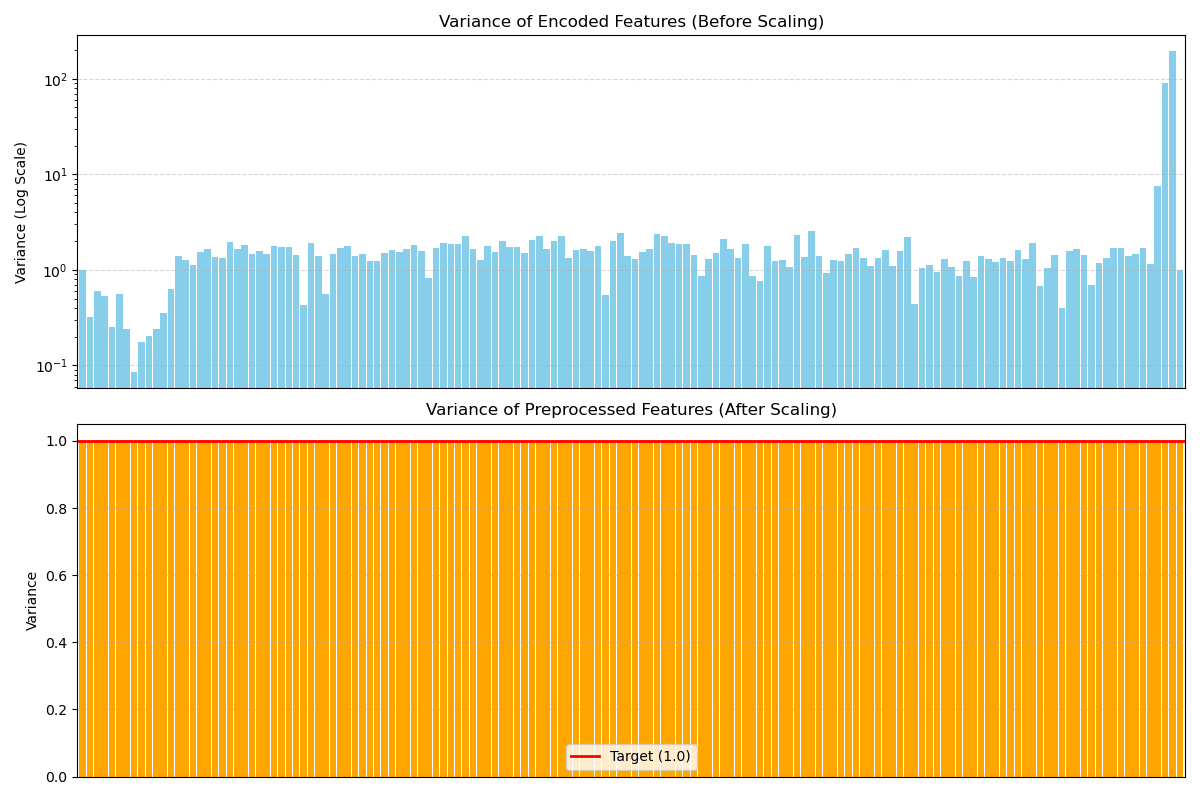

In [6]:
var_enc = responses_ft_enc.var()
var_pp = responses_ft_pp.var()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

var_enc.plot(kind='bar', ax=ax1, color='skyblue', width=0.9)
ax1.set_yscale('log') 

ax1.set_title(f'Variance of Encoded Features (Before Scaling)', fontsize=12)
ax1.set_ylabel('Variance (Log Scale)')
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_xticks([]) 

var_pp.plot(kind='bar', ax=ax2, color='orange', width=0.9)
ax2.set_title('Variance of Preprocessed Features (After Scaling)', fontsize=12)
ax2.set_ylabel('Variance')
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_xticks([]) 

ax2.axhline(y=1.0, color='red', linewidth=2, label='Target (1.0)')
ax2.legend()

plt.tight_layout()
plt.show()

#### Comment the results obtained for the variances (max 150 words):
...

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

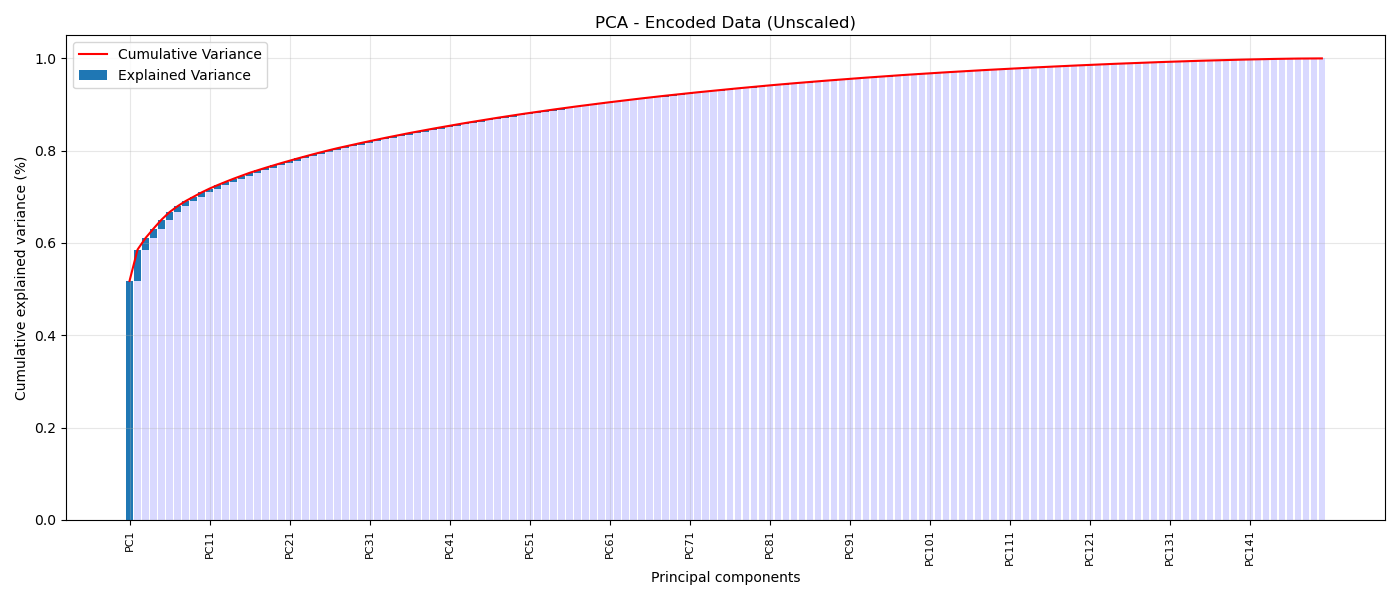

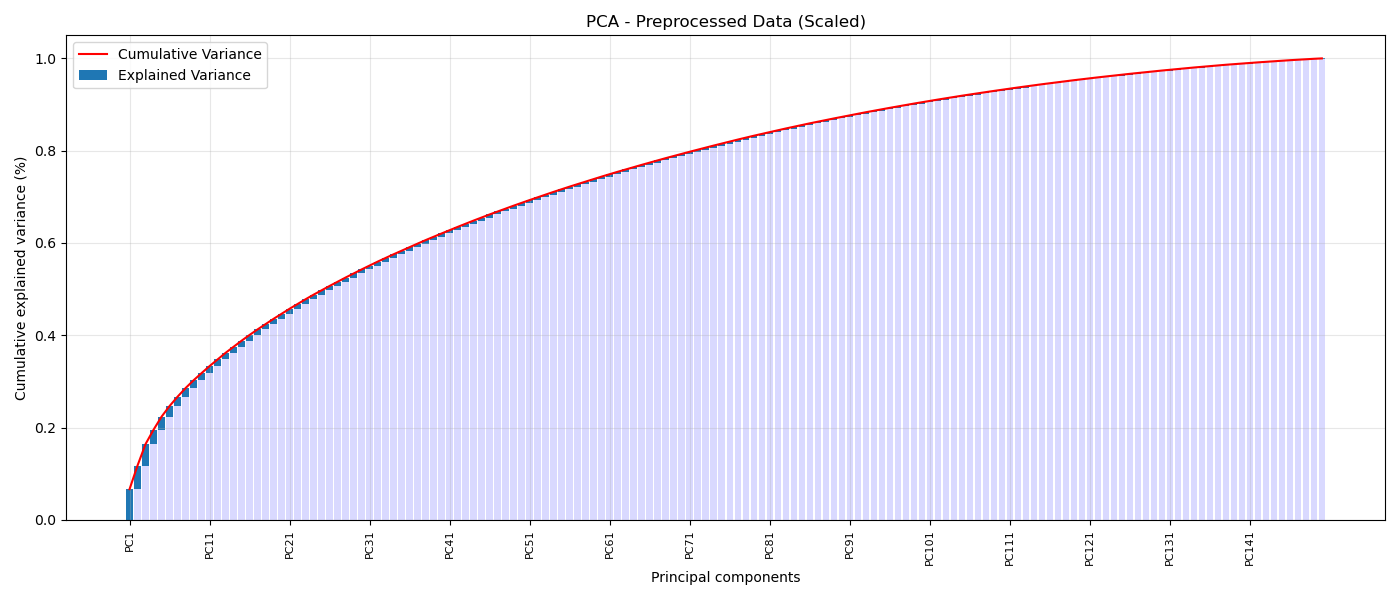

In [7]:
pca_enc = PCA()
pca_enc.fit(responses_ft_enc)

pca_pp = PCA()
pca_pp.fit(responses_ft_pp)


def plot_pca_cumulative(pca, title):
    n_features = pca.n_features_in_
    plt.figure(figsize=(14, 6)) 

    plt.bar(np.arange(n_features), 
            pca.explained_variance_ratio_, 
            bottom=np.insert(np.cumsum(pca.explained_variance_ratio_), 0, 0)[:-1],
            label='Explained Variance')

    plt.bar(np.arange(n_features), 
            np.insert(np.cumsum(pca.explained_variance_ratio_), 0, 0)[:-1], 
            color='b', alpha=0.15)

    plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r', label='Cumulative Variance')
    
    plt.title(title)
    step = 10
    ticks_loc = np.arange(0, n_features, step)
    ticks_lab = [f'PC{i+1}' for i in range(0, n_features, step)]
    plt.xticks(ticks=ticks_loc, labels=ticks_lab, rotation=90, fontsize=8)
    
    plt.xlabel('Principal components')
    plt.ylabel('Cumulative explained variance (%)')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_pca_cumulative(pca_enc, 'PCA - Encoded Data (Unscaled)')
plot_pca_cumulative(pca_pp, 'PCA - Preprocessed Data (Scaled)')

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):

...

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

Dimensions required for 33% variance (m'): 11
Selected dimensions m = min(m', 5): 5
Total preserved Var: 22.36%


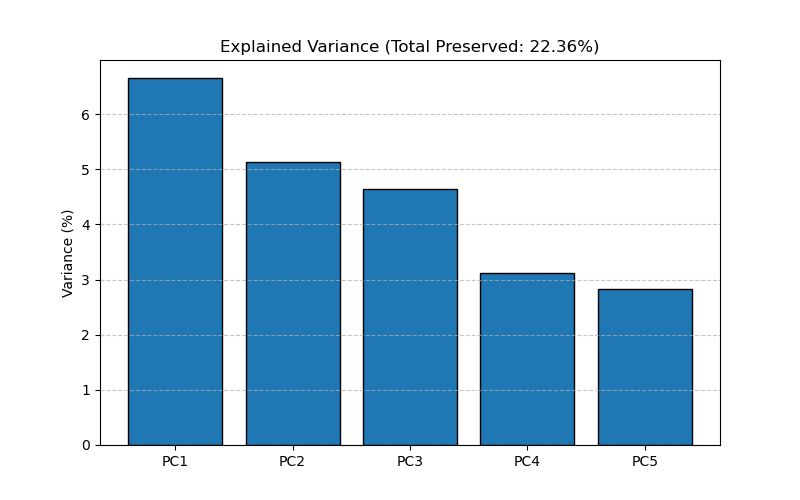

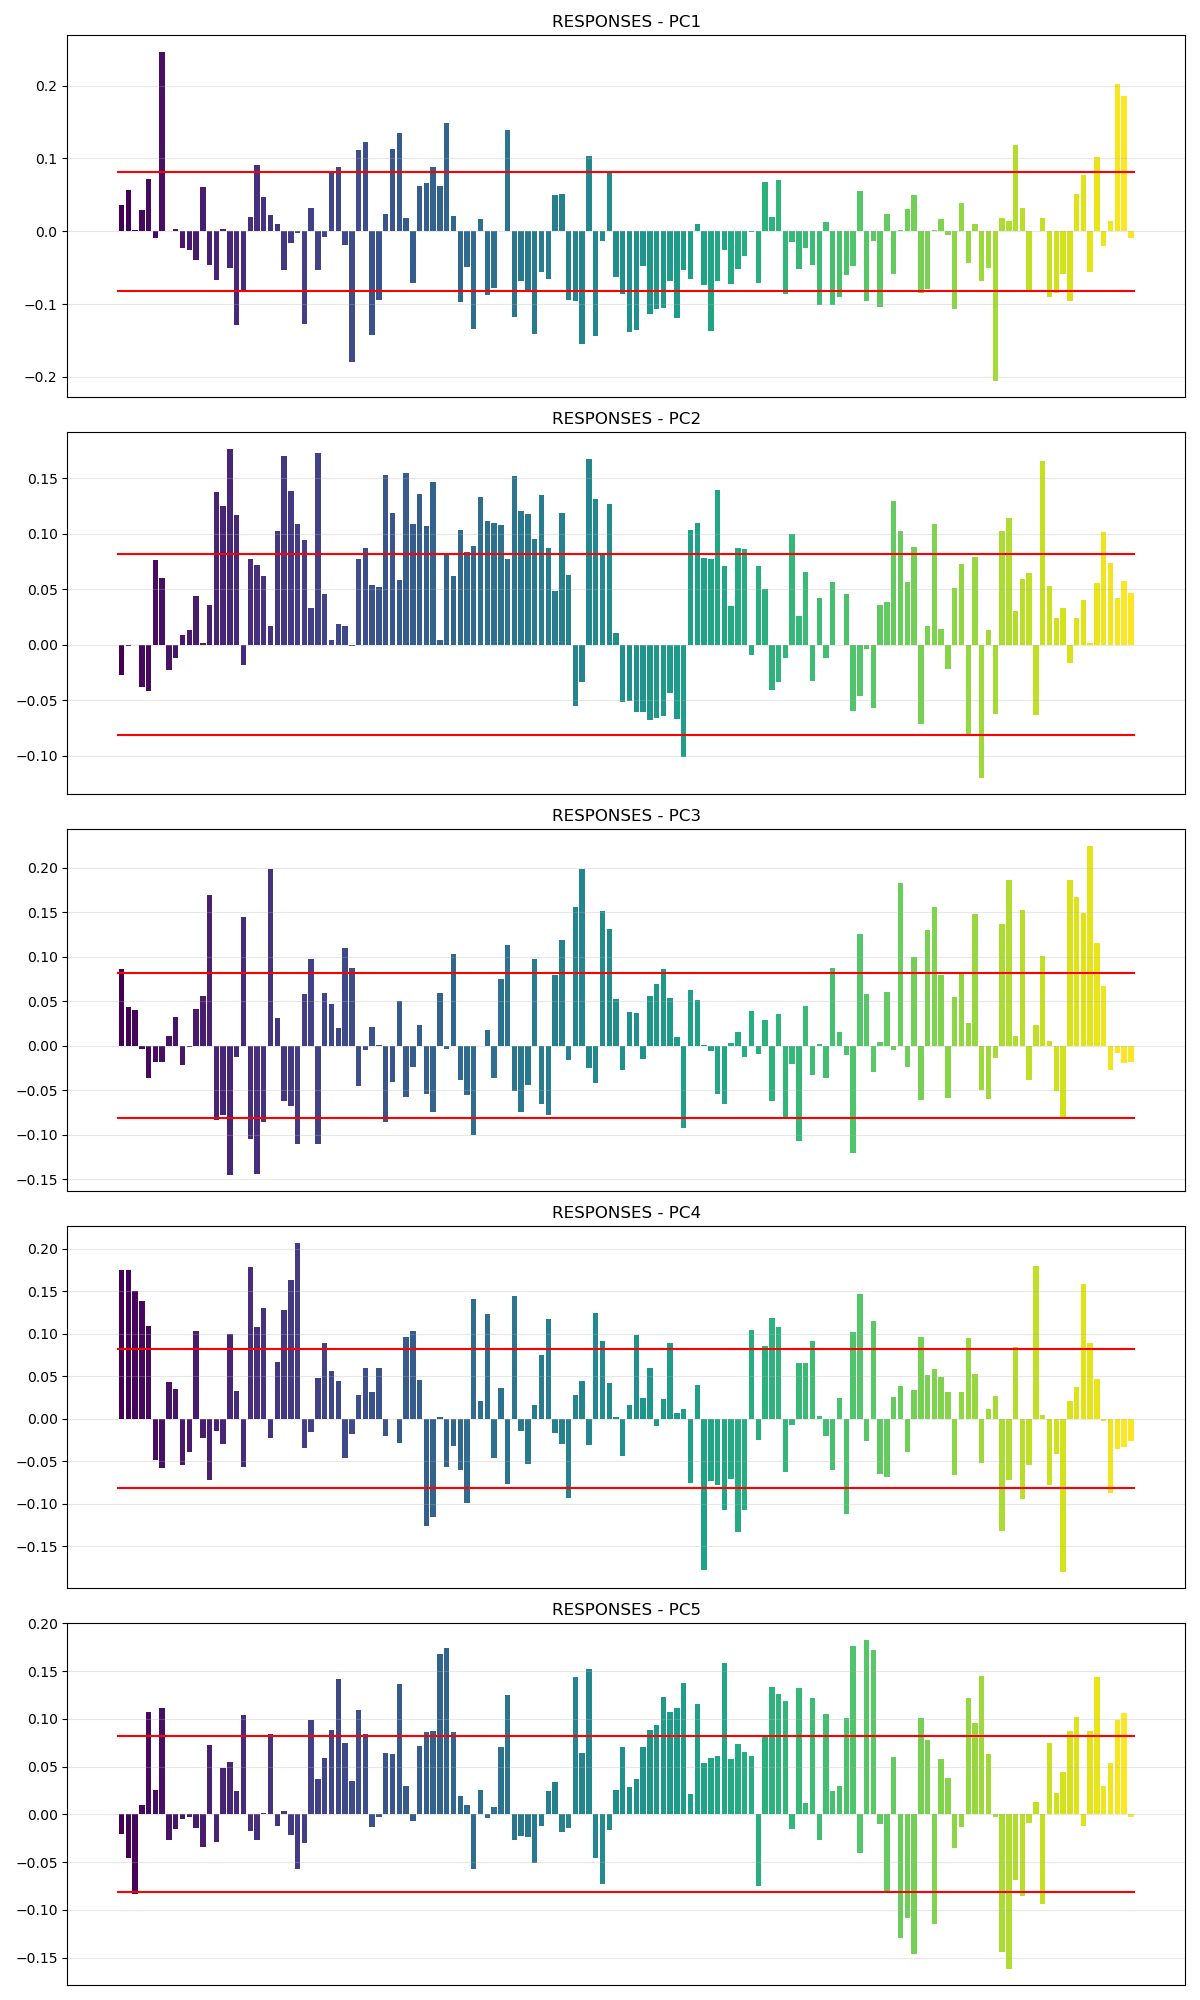


---------- PC1 ANALYSIS ----------
HIGH-VALUED POSITIVE COMPONENTS (> 0.082):
['Gender_male', 'Metal or Hardrock', 'Thriller', 'Sci-fi', 'War', 'Western', 'Action', 'Physics', 'PC', 'Cars', 'Science and technology', 'Adrenaline sports', 'Small - big dogs', 'Spending on gadgets', 'Height', 'Weight']

HIGH-VALUED NEGATIVE COMPONENTS (< -0.082):
['Musical', 'Pop', 'Latino', 'Romantic', 'Fantasy/Fairy tales', 'Animated', 'Biology', 'Reading', 'Foreign languages', 'Art exhibitions', 'Countryside, outdoors', 'Dancing', 'Gardening', 'Celebrities', 'Shopping', 'Theatre', 'Flying', 'Storm', 'Darkness', 'Spiders', 'Snakes', 'Rats', 'Dangerous dogs', 'Writing notes', 'Decision making', 'Empathy', 'Giving', 'Compassion to animals', 'Health', 'God', 'Mood swings', 'Children', 'Life struggles', 'Finding lost valuables', "Parents' advice", 'Questionnaires or polls', 'Shopping centres']
----------------------------------------


---------- PC2 ANALYSIS ----------
HIGH-VALUED POSITIVE COMPONENTS (> 0.

In [8]:
cumsum = np.cumsum(pca_pp.explained_variance_ratio_)
m_prime = np.argmax(cumsum >= 0.33) + 1
m = min(m_prime, 5)

pca_m = PCA(n_components=m)
responses_pca = pca_m.fit_transform(responses_ft_pp)
n_features = pca_m.n_features_in_
feature_names = responses_ft_pp.columns.to_list()

print(f"Dimensions required for 33% variance (m'): {m_prime}")
print(f"Selected dimensions m = min(m', 5): {m}")
print(f'Total preserved Var: {np.sum(pca_m.explained_variance_ratio_)*100:.2f}%')

plt.figure(figsize=(8, 5))
plt.bar([f'PC{i+1}' for i in range(m)], pca_m.explained_variance_ratio_ * 100, edgecolor='k')
plt.title(f'Explained Variance (Total Preserved: {np.sum(pca_m.explained_variance_ratio_)*100:.2f}%)')
plt.ylabel('Variance (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


eps = np.sqrt(1 / n_features)
colors = cm.viridis(np.linspace(0, 1, n_features))
fig, ax = plt.subplots(m, 1, figsize=(12, 4 * m))

for i in range(m):
    ax[i].bar(np.arange(n_features), pca_m.components_[i, :], color=colors)
    ax[i].plot([-0.5, n_features - 0.5], [eps, eps], 'red', linewidth=1.5)
    ax[i].plot([-0.5, n_features - 0.5], [-eps, -eps], 'red', linewidth=1.5)
    ax[i].set_xticks([]) 
    ax[i].set_title(f'RESPONSES - PC{i+1}')
    ax[i].grid(visible=True, which='both', alpha=0.3)

plt.tight_layout()
plt.show()


for ii in range(m):
    ind_great_pos_PCii = np.argwhere(pca_m.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_m.components_[ii, :] <= -eps).flatten()
    
    great_pos_PCii = [feature_names[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [feature_names[i] for i in ind_great_neg_PCii]
    
    print('')
    print(f'---------- PC{ii+1} ANALYSIS ----------')
    print(f'HIGH-VALUED POSITIVE COMPONENTS (> {eps:.3f}):')
    print(great_pos_PCii)
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS (< -{eps:.3f}):')
    print(great_neg_PCii)
    print('----------------------------------------')
    print('')

#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

...

#### Write the code for visualizing the score graph (with PC names on the axis):

In [9]:
responses_ft_pca = pca_m.transform(responses_ft_pp)

pc_names = [
    "Masculine vs Feminine",       
    "Intellectual vs Uninterested",      
    "Social vs Introspective" 
]

def plot_3d_colored(pc_index_colore):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(xs=responses_ft_pca[:, 0], 
                         ys=responses_ft_pca[:, 1], 
                         zs=responses_ft_pca[:, 2],
                         c=responses_ft_pca[:, pc_index_colore], 
                         cmap='viridis')
    
    ax.set_xlabel(pc_names[0])
    ax.set_ylabel(pc_names[1])
    ax.set_zlabel(pc_names[2])
    ax.set_title('RESPONSES - Score Graph', fontsize=14)
    plt.colorbar(scatter, label=f"Score: {pc_names[pc_index_colore]}")
    plt.show()

menu_options = [(name, i) for i, name in enumerate(pc_names)]

interact(plot_3d_colored, pc_index_colore=Dropdown(options=menu_options, description='Colora con:'));

interactive(children=(Dropdown(description='Colora con:', options=(('Masculine vs Feminine', 0), ('Intellectua…

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

In [10]:
# [write the code here]

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

...

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

...


#### Write the code for the visualizations cited in item 2 above:

In [11]:
# [write the code here]

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

...

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

In [12]:
# [write the code here]

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

...